Import necessary libraries

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Create Connection to database and Cursor

In [3]:
conn = sqlite3.connect("data/im.db")
cursor = conn.cursor()

Query the database to retrieve the table names, and verify this matches our ERD

In [4]:
q = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(q)
tables = cursor.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


![Movie Data ERD](data/movie_data_erd.jpeg)

This matches our ERD, so now we'll create a list of the table names for later use

In [333]:
table_names = [table[0] for table in tables]

['movie_basics',
 'directors',
 'known_for',
 'movie_akas',
 'movie_ratings',
 'persons',
 'principals',
 'writers']

Now we'll read each table from the SQLite DB file and save each as their own Pandas DataFrame

In [386]:
# This code loops through the table_names variable, and creates a variable with that name
# whose value is the DataFrame associated with that table.
for t in table_names:
    vars().__setitem__(t, pd.read_sql(f"""
        SELECT *
        FROM {t}
        """, conn))

Now we create a list of our DataFrames to be further analyzed

In [8]:
db = [movie_basics, directors, known_for, movie_akas, movie_ratings, persons, principals, writers]

In [9]:
for x in range(len(db)):
    print(f"{table_names[x]}: {db[x].shape}")

movie_basics: (146144, 6)
directors: (291174, 2)
known_for: (1638260, 2)
movie_akas: (331703, 8)
movie_ratings: (73856, 3)
persons: (606648, 5)
principals: (1028186, 6)
writers: (255873, 2)


In [342]:
db[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [345]:
for x in range(len(db)):
    print(f"{table_names[x]}:")
    print(db[x].info())
    print()

movie_basics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None

directors:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None

known_for:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (

# movie_akas EDA

In [12]:
movie_akas['region'].value_counts()

US      51490
XWW     18467
RU      13817
DE      11634
FR      10990
        ...  
XNA         1
BUMM        1
AI          1
EH          1
TO          1
Name: region, Length: 213, dtype: int64

In [13]:
movie_akas.loc[movie_akas["movie_id"] == 'tt1375666']

,movie_id,ordering,title,region,language,types,attributes,is_original_title
8255,tt1375666,10,Începutul,RO,None,imdbDisplay,None,0.0
8256,tt1375666,11,Початок,UA,None,None,None,0.0
8257,tt1375666,12,Algus,EE,None,None,None,0.0
8258,tt1375666,13,Početak,RS,None,None,None,0.0
8259,tt1375666,14,Chakravuyh,IN,hi,imdbDisplay,None,0.0
8260,tt1375666,15,Počátek,CZ,None,None,None,0.0
8261,tt1375666,16,Οι ονειροπαγιδευτές,GR,None,None,None,0.0
8262,tt1375666,17,Eredet,HU,None,None,None,0.0
8263,tt1375666,18,Hat'hala,IL,he,imdbDisplay,None,0.0
8264,tt1375666,19,El origen,UY,None,None,None,0.0


In [14]:
movie_akas['is_original_title'].sum()

44700.0

In [15]:
movie_akas.loc[movie_akas['is_original_title'] == 1.0]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
38,tt0369610,45,Jurassic World,None,None,original,None,1.0
80,tt0401729,7,John Carter,None,None,original,None,1.0
83,tt10010134,1,Versailles Rediscovered - The Sun King's Vanis...,None,None,original,None,1.0
86,tt10027708,1,Miguelito - Canto a Borinquen,None,None,original,None,1.0
90,tt10050722,1,Thing I Don't Get,None,None,original,None,1.0
...,...,...,...,...,...,...,...,...
331690,tt9723084,2,Anderswo. Allein in Afrika,None,None,original,None,1.0
331692,tt9726638,2,Monkey King: The Volcano,None,None,original,None,1.0
331696,tt9755806,3,Big Shark,None,None,original,None,1.0
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0


In [387]:
movie_akas_originals = movie_akas.loc[movie_akas['is_original_title'] == 1.0]

In [17]:
movie_akas_originals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44700 entries, 38 to 331700
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           44700 non-null  object 
 1   ordering           44700 non-null  int64  
 2   title              44700 non-null  object 
 3   region             6 non-null      object 
 4   language           4 non-null      object 
 5   types              44700 non-null  object 
 6   attributes         0 non-null      object 
 7   is_original_title  44700 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [391]:
movie_akas_originals.drop(labels=['region', 'language', 'attributes', 'is_original_title', 'types', 'ordering'], axis=1, inplace=True)

C:\Users\Kevin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [392]:
originals = movie_akas_originals

In [405]:
len(list(set(originals['movie_id'])))

36857

In [411]:
originals['movie_id'].value_counts()[0:40]

tt1288367    3
tt4295258    2
tt1754830    2
tt3519772    2
tt5797820    2
tt3052652    2
tt2219210    2
tt3665498    2
tt2379402    2
tt1842446    2
tt3012776    2
tt2401715    2
tt1564563    2
tt2392386    2
tt5255284    2
tt2558318    2
tt3444312    2
tt6447474    2
tt2287214    2
tt0339736    2
tt2378191    2
tt1796453    2
tt2943910    2
tt2851954    2
tt3228994    2
tt1226736    2
tt5215088    2
tt1430116    2
tt4537986    2
tt2445698    2
tt2756910    2
tt3313314    2
tt2940280    2
tt2072934    2
tt4298966    2
tt8106596    2
tt8707008    2
tt1776196    1
tt2141717    1
tt4539442    1
Name: movie_id, dtype: int64

In [413]:
originals.loc[originals['movie_id'] == 'tt1754830']

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
5615,tt1754830,Being Us,2013,106.0,Drama,6.4,97
5616,tt1754830,Us,2013,106.0,Drama,6.4,97


In [414]:
originals.loc[originals['movie_id'] == 'tt3519772']

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
19288,tt3519772,Burn Country,2016,102.0,"Drama,Thriller,War",4.7,706
19289,tt3519772,The Fixer,2016,102.0,"Drama,Thriller,War",4.7,706


In [412]:
originals.loc[originals['movie_id'] == 'tt4295258']

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
23218,tt4295258,Across the Line,2015,87.0,Drama,4.9,338
23219,tt4295258,Undone,2015,87.0,Drama,4.9,338


In [408]:
originals.loc[originals['movie_id'] == 'tt1288367']

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
1148,tt1288367,Operation Belvis Bash,2011,85.0,"Comedy,Music,Romance",6.4,1002
1149,tt1288367,Zero Dark Dirty,2011,85.0,"Comedy,Music,Romance",6.4,1002
1150,tt1288367,Operation Belvis Bash,2011,85.0,"Comedy,Music,Romance",6.4,1002


In [406]:
len(originals)

36895

In [20]:
len(list(set(movie_akas['movie_id'])))

122302

In [21]:
movie_akas_gb_id = movie_akas.groupby(by='movie_id').count().sort_values(by='region', ascending=False)

In [22]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [23]:
movie_akas_gb_id.tail()

,ordering,title,region,language,types,attributes,is_original_title
movie_id,,,,,,,
tt6925738,2,2,0,0,1,1,2
tt7326320,2,2,0,0,2,0,2
tt4781446,2,2,0,0,2,0,2
tt6222286,2,2,0,0,2,0,2
tt1843331,1,1,0,0,0,0,1


In [24]:
movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

Based on this .info() method, we see we have some null values in a few tables that may need dealing with:
- movie_basics:
    - ~32k nulls in runtime column
- movie_akas:
    - ~290k nulls in language column
    - ~315k nulls in attributes column\
    - This table actually has many redundant columns. After grouping by movie_id we see there are only 122,302 unique movies
    - Most of these duplicate films were re-released in other regions.
    - 

# movie_ratings EDA

In [25]:
movie_ratings_sorted = movie_ratings.sort_values(by='averagerating', ascending=False)

In [26]:
movie_ratings_sorted = movie_ratings_sorted.loc[movie_ratings_sorted['numvotes'] > 1000]

In [27]:
movie_ratings.sort_values(by='numvotes', ascending=False)

,movie_id,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


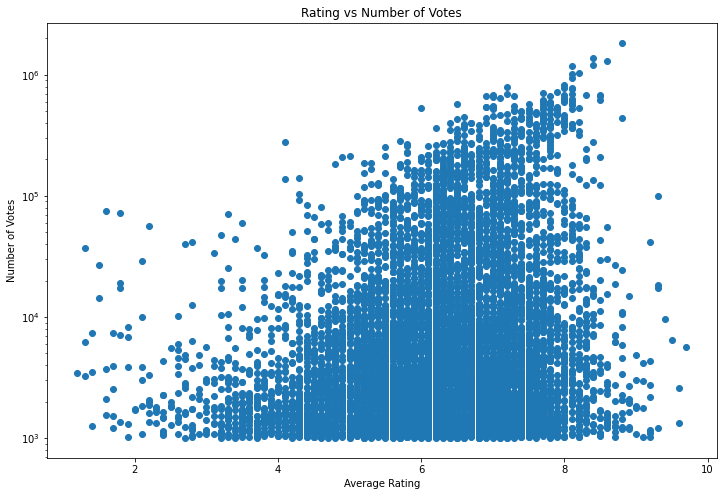

In [385]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(movie_ratings_sorted['averagerating'], movie_ratings_sorted['numvotes'])
plt.yscale("log")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Votes")
ax.set_title("Rating vs Number of Votes");

# tables with person_id
    - persons
    - principals
    - known_for
    - directors
    - writers

In [29]:
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [30]:
principals['category'].value_counts()[0:7]

actor              256718
director           146393
actress            146208
producer           113724
cinematographer     80091
composer            77063
writer              74357
Name: category, dtype: int64

In [31]:
known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


# Joining tables from imdb database

We want to keep the following tables/columns for further analysis:
- movie_akas
    - movie_id
    - title
- movie_ratings
    - averagerating
    - numvotes
- directors
    - person_id 
- writers
    - person_id
- principals
    - person_id WHERE job == 'actor'

We first need to join principals (pr) with persons (pe) using person_id. We want the resulting table to have the columns:
    - pr.movie_id, pr.person_id, pr.job, pe.primary_name, pe.primary_profession

After this we can merge originals and movie_basics on movie_id to obtain the genres and runtime columns

In [394]:
originals = originals.set_index('movie_id')

In [395]:
movie_basics = movie_basics.set_index('movie_id')

In [396]:
movie_ratings = movie_ratings.set_index('movie_id')

In [397]:
originals = originals.join(movie_basics, how='inner', rsuffix='_mb')

In [398]:
originals = originals.join(movie_ratings, how='inner', rsuffix='_mb')

In [399]:
originals.drop(labels=['primary_title', 'original_title'], axis=1, inplace=True)

In [400]:
originals = originals.reset_index()

In [357]:
originals.loc[(originals['numvotes'] >= 500000) & (originals['averagerating'] > 7.5)].sort_values('averagerating', ascending=False)

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
1556,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
206,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
22558,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
14124,tt2582802,Whiplash,2014,106.0,"Drama,Music",8.5,616916
4404,tt1675434,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343
1452,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
6946,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
65,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
368,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
9468,tt2096673,Inside Out,2015,95.0,"Adventure,Animation,Comedy",8.2,536181


In [418]:
originals_sub = originals

In [401]:
originals

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
36890,tt9899860,Didan in film jorm ast,2019,100.0,"Drama,Thriller",8.1,7
36891,tt9899880,Columbus,2018,85.0,Comedy,5.8,5
36892,tt9903952,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5
36893,tt9905462,Pengalila,2019,111.0,Drama,8.4,600


In [389]:
originals.loc[originals['runtime_minutes'] < 10000]

KeyError: 'runtime_minutes'

In [419]:
originals_sub = originals.loc[originals['numvotes'] > 150000]

In [416]:
originals_sub = originals_sub.loc[originals['averagerating'] > 7]

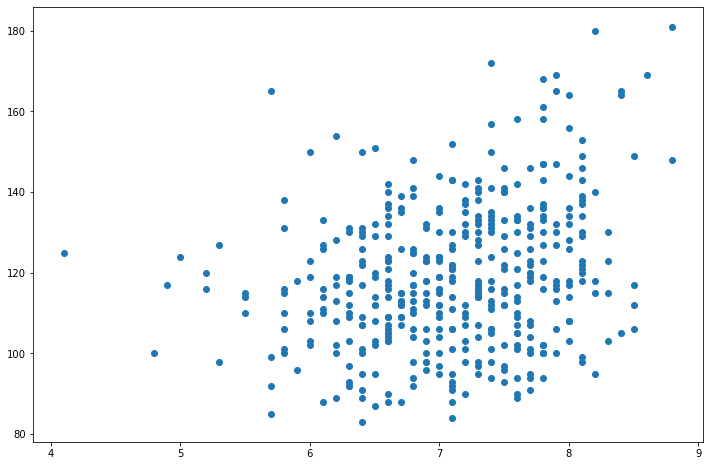

In [420]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(originals_sub['averagerating'], originals_sub['runtime_minutes'])

<H3>We now have a table with movie_id, title, start_year, runtime, and genres, averagerating, and numvotes
Next we need to begin merging people from the tables with person_id. We can start by dropping anyone who doesnt contain
a movie_id within our current table 'originals'. We can create a separate table for people which will contain:

- movie_id
- person_id
- category (i.e. actors, directors, etc.)

movie_id 
person_id
category
primary_name

In [40]:
principals_test = principals.set_index('person_id')

In [41]:
persons_test = persons.set_index('person_id')

In [42]:
principals_test = principals_test.join(persons_test, how='inner', rsuffix='_per')

In [64]:
principals_test.drop(labels=['birth_year', 'death_year', 'job', 'ordering'], axis=1)

,movie_id,category,characters,primary_name,primary_profession
person_id,,,,,
nm0000002,tt1626811,self,"[""Herself - Interviewee""]",Lauren Bacall,"actress,soundtrack"
nm0000002,tt0858500,actress,"[""May""]",Lauren Bacall,"actress,soundtrack"
nm0000002,tt1368858,actress,"[""Anne-Marie""]",Lauren Bacall,"actress,soundtrack"
nm0000002,tt2053352,archive_footage,"[""Herself""]",Lauren Bacall,"actress,soundtrack"
nm0000003,tt2004245,archive_footage,"[""Herself""]",Brigitte Bardot,"actress,soundtrack,producer"
...,...,...,...,...,...
nm9993494,tt7722258,writer,None,Amjad Ali,writer
nm9993573,tt10299418,director,None,Lakisha Louissaint,"director,writer,producer"
nm9993616,tt4844148,actor,"[""Mick Owen""]",Ryan Mac Lennan,actor


In [44]:
principals_test.loc[principals_test['movie_id'] == 'tt1375666']

,movie_id,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession
person_id,,,,,,,,,
nm0000138,tt1375666,1,actor,None,"[""Cobb""]",Leonardo DiCaprio,1974.0,NaN,"actor,producer,writer"
nm0001877,tt1375666,7,composer,None,None,Hans Zimmer,1957.0,NaN,"music_department,composer,soundtrack"
nm0002892,tt1375666,8,cinematographer,director of photography,None,Wally Pfister,1961.0,NaN,"cinematographer,camera_department,director"
nm0245596,tt1375666,10,production_designer,None,None,Guy Hendrix Dyas,1968.0,NaN,"art_department,production_designer,visual_effects"
nm0330687,tt1375666,2,actor,None,"[""Arthur""]",Joseph Gordon-Levitt,1981.0,NaN,"actor,producer,soundtrack"
nm0634240,tt1375666,5,director,None,None,Christopher Nolan,1970.0,NaN,"writer,producer,director"
nm0680983,tt1375666,3,actress,None,"[""Ariadne""]",Ellen Page,1987.0,NaN,"actress,producer,soundtrack"
nm0809059,tt1375666,9,editor,None,None,Lee Smith,1960.0,NaN,"editor,sound_department,editorial_department"
nm0858799,tt1375666,6,producer,producer,None,Emma Thomas,NaN,NaN,"producer,miscellaneous,actress"


<H3> We can generate an average rating for each person_id by joining principals_test with movie_ratings on movie_id,
then grouping by person_id, and aggregating by average. 

In [46]:
originals_movie_ids = list(originals['movie_id'])

# directors

In [45]:
directors = directors.drop_duplicates()

In [47]:
directors_bool = [movie_id in originals_movie_ids for movie_id in directors['movie_id']]

In [48]:
directors_in_orig = directors.loc[directors_bool]

In [49]:
directors_in_orig.value_counts()

movie_id   person_id 
tt9911774  nm10536451    1
tt2363481  nm5006702     1
           nm3986921     1
           nm3025400     1
           nm1546474     1
                        ..
tt4610124  nm2437042     1
           nm1760795     1
tt4610094  nm0635895     1
tt4608574  nm1953143     1
tt0063540  nm0712540     1
Length: 42682, dtype: int64

# writers

In [50]:
writers = writers.drop_duplicates()

In [51]:
writers_bool = [movie_id in originals_movie_ids for movie_id in writers['movie_id']]

In [52]:
writers_in_orig = writers.loc[writers_bool]

In [53]:
writers_in_orig.value_counts()

movie_id   person_id 
tt9911774  nm10536454    1
tt2294629  nm0026153     1
tt2294807  nm0904451     1
           nm0617492     1
           nm0500467     1
                        ..
tt4453388  nm0895350     1
           nm0360694     1
tt4453306  nm5539209     1
tt4453286  nm4417399     1
tt0063540  nm0023551     1
Length: 63633, dtype: int64

# principals

In [54]:
principals = principals.drop_duplicates()

In [208]:
originals.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [55]:
principals_bool = [movie_id in originals_movie_ids for movie_id in principals['movie_id']]

In [56]:
principals_in_orig = principals.loc[principals_bool]

In [ ]:
principals.loc[]

In [85]:
principals_names = principals_in_orig.set_index('person_id').join(persons.set_index('person_id'), how='inner')

In [93]:
principals_names = principals_names.reset_index()

In [94]:
principals_names.head()

,movie_id,person_id,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt1626811,nm0000002,4,self,None,"[""Herself - Interviewee""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack"
1,tt0858500,nm0000002,2,actress,None,"[""May""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack"
2,tt1368858,nm0000002,1,actress,None,"[""Anne-Marie""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack"
3,tt2053352,nm0000002,4,archive_footage,None,"[""Herself""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack"
4,tt4323536,nm0000003,3,archive_footage,None,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer"


In [70]:
movie_ratings.head()

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [96]:
prin_names_ratings = principals_names.set_index('movie_id').join(movie_ratings, how='inner')

In [98]:
prin_names_ratings = prin_names_ratings.reset_index()

In [236]:
prin_names_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333460 entries, 0 to 333459
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            333460 non-null  object 
 1   person_id           333460 non-null  object 
 2   ordering            333460 non-null  int64  
 3   category            333460 non-null  object 
 4   job                 77658 non-null   object 
 5   characters          128021 non-null  object 
 6   primary_name        333460 non-null  object 
 7   birth_year          121019 non-null  float64
 8   death_year          4812 non-null    float64
 9   primary_profession  324121 non-null  object 
 10  averagerating       333460 non-null  float64
 11  numvotes            333460 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 30.5+ MB


In [116]:
prin_names_ratings.head()

,movie_id,person_id,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt0063540,nm0006210,10,composer,None,None,Naushad,1919.0,2006.0,"composer,soundtrack,music_department",7.0,77
1,tt0063540,nm0023551,6,writer,dialogue,None,Abrar Alvi,1927.0,2009.0,"writer,actor,director",7.0,77
2,tt0063540,nm0347899,8,writer,dialogue,None,Gulzar,1936.0,NaN,"music_department,writer,soundtrack",7.0,77
3,tt0063540,nm0474801,1,actor,None,"[""Kundan S. Prasad"",""Bajrangi""]",Dilip Kumar,1922.0,NaN,"actor,writer,director",7.0,77
4,tt0063540,nm0474876,4,actor,None,"[""Dwarka N. Prasad""]",Sanjeev Kumar,1938.0,1985.0,actor,7.0,77


In [497]:
roles = ["actor", "actress", "director", "writer", "producer", "composer"]
top_actors, top_actresses, top_directors, top_writers, top_producers, top_composers = [], [], [], [], [], []
roles_list = [top_actors, top_actresses, top_directors, top_writers, top_producers, top_composers]

In [509]:
def create_top_tables(srole, source):
    """
    INPUT:
    This function is taking in a list of strings, and a cleaned principals table.
    The list of strings are values from the roles within the Persons Table, Category Column, which we are interested in. 
    The Principals table has already been cleaned to have non-original works and unncessary columns removed.
    
    OUTPUT:
    Outputs a DataFrame whose variable name is the relevant role, ordered by total number of votes.
    """
    vars()[srole] = source.loc[source['category'] == srole].groupby('person_id').mean().sort_values(by='averagerating', ascending=False)
    vars()[srole]['total_numvotes'] = source.loc[source['category'] == srole].groupby('person_id').sum()['numvotes']
    vars()[srole] = vars()[srole].drop(['birth_year', 'ordering', 'death_year'], axis=1).join(persons.set_index('person_id'), how='inner').drop(labels='death_year', axis=1).rename(columns={'numvotes': 'avg_numvotes'})
    vars()[srole] = vars()[srole].loc[vars()[srole]['avg_numvotes'] >= 200000].sort_values('total_numvotes', ascending=False)
    vars()[srole]['avg_numvotes'] = vars()[srole]['avg_numvotes'].astype('int64')
    return vars()[srole]

In [510]:
roles = ["actor", "actress", "director", "writer", "producer", "composer"]
for i in range(len(roles)):
    vars()[roles[i]] = create_top_tables(roles[i], prin_names_ratings)

In [511]:
director

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm0634240,8.425000,1248687,4994749,Christopher Nolan,1970.0,"writer,producer,director"
nm0000217,7.657143,346109,2422764,Martin Scorsese,1942.0,"producer,director,actor"
nm0751648,8.225000,590455,2361820,Joe Russo,1971.0,"producer,director,writer"
nm0751577,8.225000,590455,2361820,Anthony Russo,1970.0,"producer,director,writer"
nm0898288,7.800000,335658,2013951,Denis Villeneuve,1967.0,"director,writer,editor"
...,...,...,...,...,...,...
nm0533691,7.300000,213542,213542,Angus MacLane,NaN,"animation_department,actor,writer"
nm0745247,8.500000,210869,210869,Rodney Rothman,NaN,"writer,producer,director"
nm2130108,8.500000,210869,210869,Bob Persichetti,NaN,"animation_department,art_department,director"


In [472]:
create_top_tables(["actor"], prin_names_ratings)

           ordering  birth_year  death_year  averagerating  numvotes
person_id                                                           
nm2241706       3.0         NaN         NaN            9.6    2604.0
nm0158529       1.0         NaN         NaN            9.6    2604.0
nm2996578       2.0         NaN         NaN            9.5       6.0
nm6731026       4.0         NaN         NaN            9.5      65.0
nm1010298       1.0         NaN         NaN            9.5       6.0
...             ...         ...         ...            ...       ...
nm4316717      10.0         NaN         NaN            1.0     385.0
nm7440262       4.0         NaN         NaN            1.0     112.0
nm8292003       4.0         NaN         NaN            1.0      21.0
nm3117618       2.0      1974.0         NaN            1.0     440.0
nm7621820       3.0         NaN         NaN            1.0     369.0

[43842 rows x 5 columns]

           ordering  birth_year  death_year  averagerating  numvotes  \
pers

In [480]:
top_actors = prin_names_ratings.loc[prin_names_ratings['category'] == 'actor'].groupby('person_id').mean().sort_values(by='averagerating', ascending=False)
top_actors['total_numvotes'] = prin_names_ratings.loc[prin_names_ratings['category'] == 'actor'].groupby('person_id').sum()['numvotes']
top_actors = top_actors.drop(['birth_year', 'ordering', 'death_year'], axis=1).join(persons.set_index('person_id'), how='inner').drop(labels='death_year', axis=1).rename(columns={'numvotes': 'avg_numvotes'})
top_actors = top_actors.loc[top_actors['avg_numvotes'] >= 200000].sort_values('total_numvotes', ascending=False)
top_actors['avg_numvotes'] = top_actors['avg_numvotes'].astype('int64')

In [481]:
top_actors

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm0000375,7.530769,488930,6356093,Robert Downey Jr.,1965.0,"actor,producer,soundtrack"
nm0000138,8.088889,697068,6273617,Leonardo DiCaprio,1974.0,"actor,producer,writer"
nm0262635,7.266667,367209,5508138,Chris Evans,1981.0,"actor,producer,director"
nm0362766,7.361538,380252,4943284,Tom Hardy,1977.0,"actor,producer,writer"
nm1165110,6.933333,323257,4848858,Chris Hemsworth,1983.0,"actor,soundtrack,producer"
...,...,...,...,...,...,...
nm1157013,6.700000,221664,221664,Derek Jeter,1974.0,"actor,producer,executive"
nm0001103,6.600000,216350,216350,Tony Danza,1951.0,"actor,producer,director"
nm0642145,7.300000,213542,213542,Ed O'Neill,1946.0,"actor,soundtrack"


In [310]:
top_actresses = prin_names_ratings.loc[prin_names_ratings['category'] == 'actress'].groupby('person_id').mean().sort_values(by='averagerating', ascending=False)
top_actresses['total_numvotes'] = prin_names_ratings.loc[prin_names_ratings['category'] == 'actress'].groupby('person_id').sum()['numvotes']
top_actresses = top_actresses.drop(['birth_year', 'ordering', 'death_year'], axis=1).join(persons.set_index('person_id'), how='inner').drop(labels='death_year', axis=1).rename(columns={'numvotes': 'avg_numvotes'})
top_actresses = top_actresses.loc[top_actresses['avg_numvotes'] >= 200000]
top_actresses['avg_numvotes'] = top_actresses['avg_numvotes'].astype('int64')

In [311]:
top_directors = prin_names_ratings.loc[prin_names_ratings['category'] == 'director'].groupby('person_id').mean().sort_values(by='averagerating', ascending=False)
top_directors['total_numvotes'] = prin_names_ratings.loc[prin_names_ratings['category'] == 'director'].groupby('person_id').sum()['numvotes']
top_directors = top_directors.drop(['birth_year', 'ordering', 'death_year'], axis=1).join(persons.set_index('person_id'), how='inner').drop(labels='death_year', axis=1).rename(columns={'numvotes': 'avg_numvotes'})
top_directors = top_directors.loc[top_directors['avg_numvotes'] >= 200000]
top_directors['avg_numvotes'] = top_directors['avg_numvotes'].astype('int64')

In [312]:
top_writers = prin_names_ratings.loc[prin_names_ratings['category'] == 'writer'].groupby('person_id').mean().sort_values(by='averagerating', ascending=False)
top_writers['total_numvotes'] = prin_names_ratings.loc[prin_names_ratings['category'] == 'writer'].groupby('person_id').sum()['numvotes']
top_writers = top_writers.drop(['birth_year', 'ordering', 'death_year'], axis=1).join(persons.set_index('person_id'), how='inner').drop(labels='death_year', axis=1).rename(columns={'numvotes': 'avg_numvotes'})
top_writers = top_writers.loc[top_writers['avg_numvotes'] >= 200000]
top_writers['avg_numvotes'] = top_writers['avg_numvotes'].astype('int64')

In [313]:
top_producers = prin_names_ratings.loc[prin_names_ratings['category'] == 'producer'].groupby('person_id').mean().sort_values(by='averagerating', ascending=False)
top_producers['total_numvotes'] = prin_names_ratings.loc[prin_names_ratings['category'] == 'producer'].groupby('person_id').sum()['numvotes']
top_producers = top_producers.drop(['birth_year', 'ordering', 'death_year'], axis=1).join(persons.set_index('person_id'), how='inner').drop(labels='death_year', axis=1).rename(columns={'numvotes': 'avg_numvotes'})
top_producers = top_producers.loc[top_producers['avg_numvotes'] >= 200000]
top_producers['avg_numvotes'] = top_producers['avg_numvotes'].astype('int64')

In [314]:
top_composers = prin_names_ratings.loc[prin_names_ratings['category'] == 'composer'].groupby('person_id').mean().sort_values(by='averagerating', ascending=False)
top_composers['total_numvotes'] = prin_names_ratings.loc[prin_names_ratings['category'] == 'composer'].groupby('person_id').sum()['numvotes']
top_composers = top_composers.drop(['birth_year', 'ordering', 'death_year'], axis=1).join(persons.set_index('person_id'), how='inner').drop(labels='death_year', axis=1).rename(columns={'numvotes': 'avg_numvotes'})
top_composers = top_composers.loc[top_composers['avg_numvotes'] >= 200000]
top_composers['avg_numvotes'] = top_composers['avg_numvotes'].astype('int64')

In [294]:
top_actors.to_csv("data/cleaned/top_actors.csv")

In [329]:
top_actors.sort_values(by='total_numvotes', ascending=False)[0:10]

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm0000375,7.530769,488930,6356093,Robert Downey Jr.,1965.0,"actor,producer,soundtrack"
nm0000138,8.088889,697068,6273617,Leonardo DiCaprio,1974.0,"actor,producer,writer"
nm0262635,7.266667,367209,5508138,Chris Evans,1981.0,"actor,producer,director"
nm0362766,7.361538,380252,4943284,Tom Hardy,1977.0,"actor,producer,writer"
nm1165110,6.933333,323257,4848858,Chris Hemsworth,1983.0,"actor,soundtrack,producer"
nm0749263,7.323529,284275,4832689,Mark Ruffalo,1967.0,"actor,producer,director"
nm0177896,6.818750,293283,4692529,Bradley Cooper,1975.0,"actor,producer,soundtrack"
nm0000190,6.847368,202346,3844585,Matthew McConaughey,1969.0,"actor,producer,soundtrack"
nm0330687,7.000000,306292,3675504,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack"


In [319]:
top_actresses.sort_values(by='total_numvotes', ascending=False)[0:10]

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm2225369,6.811111,279393,5029088,Jennifer Lawrence,1990.0,"actress,soundtrack,producer"
nm0004266,6.461111,249976,4499568,Anne Hathaway,1982.0,"actress,soundtrack,producer"
nm0424060,6.992308,333362,4333717,Scarlett Johansson,1984.0,"actress,soundtrack,producer"
nm0010736,7.128571,263676,3691471,Amy Adams,1974.0,"actress,soundtrack,producer"
nm1297015,6.633333,220766,3311500,Emma Stone,1988.0,"actress,soundtrack,producer"
nm0757855,6.925000,210565,2526790,Zoe Saldana,1978.0,"actress,producer,writer"
nm0914612,6.722222,248113,2233022,Emma Watson,1990.0,"actress,soundtrack,producer"
nm0397171,7.075000,207876,1663013,Bryce Dallas Howard,1981.0,"actress,director,writer"
nm0000569,6.685714,236344,1654409,Gwyneth Paltrow,1972.0,"actress,soundtrack,producer"


In [320]:
top_directors.sort_values(by='total_numvotes', ascending=False)[0:10]

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm0634240,8.425000,1248687,4994749,Christopher Nolan,1970.0,"writer,producer,director"
nm0000217,7.657143,346109,2422764,Martin Scorsese,1942.0,"producer,director,actor"
nm0751648,8.225000,590455,2361820,Joe Russo,1971.0,"producer,director,writer"
nm0751577,8.225000,590455,2361820,Anthony Russo,1970.0,"producer,director,writer"
nm0898288,7.800000,335658,2013951,Denis Villeneuve,1967.0,"director,writer,editor"
nm0000631,6.585714,284070,1988493,Ridley Scott,1937.0,"producer,director,production_designer"
nm0891216,7.450000,470400,1881600,Matthew Vaughn,1971.0,"producer,writer,director"
nm0923736,7.533333,621554,1864664,Joss Whedon,1964.0,"writer,producer,director"
nm0811583,6.640000,369098,1845493,Zack Snyder,1966.0,"producer,director,writer"


In [331]:
top_producers.sort_values(by='total_numvotes', ascending=False)[0:10]

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm0858799,8.425000,1248687,4994749,Emma Thomas,NaN,"producer,miscellaneous,actress"
nm0270559,7.350000,640711,3844269,Kevin Feige,1973.0,"producer,miscellaneous,production_manager"
nm0746273,6.785714,481407,3369853,Charles Roven,1949.0,"producer,executive,actor"
nm1334526,7.125000,368128,2945031,Simon Kinberg,1973.0,"producer,writer,director"
nm0382268,7.670000,256252,2562526,David Heyman,1961.0,"producer,actor,executive"
nm1333357,7.400000,337303,2361121,Bryan Burk,1968.0,"producer,writer"
nm1749221,6.590000,228557,2285570,Nina Jacobson,NaN,"producer,miscellaneous"
nm0453091,6.900000,228321,2283218,Jon Kilik,1956.0,"producer,assistant_director,production_manager"
nm0586969,6.700000,245870,2212837,Arnon Milchan,1944.0,"producer,miscellaneous,actor"


In [321]:
top_composers.sort_values(by='total_numvotes', ascending=False)[0:10]

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm0001877,6.733333,294616,4419250,Hans Zimmer,1957.0,"music_department,composer,soundtrack"
nm1888527,6.875000,290180,2321446,Steven Price,1977.0,"music_department,composer,soundtrack"
nm0006293,7.160000,320945,1604729,Alan Silvestri,1950.0,"composer,soundtrack,music_department"
nm3225654,8.250000,526493,1052986,Justin Hurwitz,1985.0,"writer,producer,soundtrack"
nm0005271,7.500000,334702,1004106,Randy Newman,1943.0,"soundtrack,music_department,composer"
nm0614774,6.600000,352105,704210,Walter Murphy,1952.0,"music_department,composer,soundtrack"
nm0653211,7.700000,292901,585803,John Ottman,1964.0,"composer,music_department,soundtrack"
nm2844448,7.500000,516998,516998,Kristen Anderson-Lopez,1972.0,"soundtrack,music_department,composer"
nm1841348,8.000000,467232,467232,Arcade Fire,NaN,"soundtrack,composer,miscellaneous"


In [332]:
top_writers.sort_values(by='total_numvotes', ascending=False)[0:10]

,averagerating,avg_numvotes,total_numvotes,primary_name,birth_year,primary_profession
person_id,,,,,,
nm0498278,7.175000,465141,7442258,Stan Lee,1922.0,"producer,writer,actor"
nm0456158,7.223077,515647,6703417,Jack Kirby,1917.0,"writer,animation_department,miscellaneous"
nm1321656,7.425000,486054,3888436,Stephen McFeely,NaN,"writer,producer,actor"
nm1321655,7.425000,486054,3888436,Christopher Markus,NaN,"writer,producer,actor"
nm1578335,7.550000,509105,3054633,Michael Arndt,1965.0,"writer,miscellaneous,producer"
nm0963359,7.122222,320365,2883286,Jane Goldman,1970.0,"producer,writer"
nm0333060,6.575000,678893,2715574,David S. Goyer,1965.0,"writer,producer,director"
nm0634300,8.500000,1343551,2687103,Jonathan Nolan,1976.0,"writer,producer,director"
nm0800209,7.450000,645872,2583490,Joe Simon,1913.0,"writer,miscellaneous"


In [ ]:
top_writers.sort_values(by='averagerating', ascending=False)[0:10]

# known_for

In [229]:
known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


# persons

In [233]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
